In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

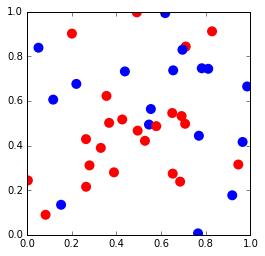

In [521]:
points = np.random.random_sample((40, 3))

points[:,2] = np.round(points[:,2])
#points = np.append(points, np.random.randint(2, size=(10,1)), axis=1)

# for i, p in enumerate(points):
#     if p[0] * p[1] > .2:
#         points[i,2] = 1
#     else:
#         points[i,2] = 0
        
cs = ['r' if v == 0 else 'b' for v in points[:,2]]
plt.axes().set_aspect('equal')
plt.axis([0, 1, 0, 1])
plt.scatter(points[:,0], points[:,1], s=100, c=cs, linewidths=0)

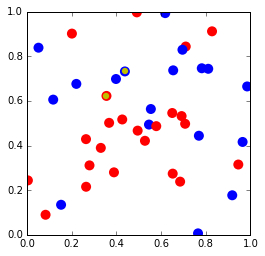

In [522]:
from IPython.html.widgets import interact

def neighbors(testp, points, k=4):
    n = set()
    while len(n) < k:
        mind = float('+inf')
        mini = -1
        for i, p in enumerate(points):
            if i in n:
                continue
            testd = np.sqrt((p[0]-testp[0])**2 + (p[1]-testp[1])**2)
            if testd < mind:
                mind = testd
                mini = i
        n.add(mini)
    return n

def classify(n):
    vote = 0
    mean = 0
    for i in n:
        vote += points[i,2] * 2 - 1
        mean += points[i,2]
        
    mean /= len(n)
    return vote, mean

def mean(n):
    
    return m

def viz_n(x, y):
    k = 2
    n = neighbors([x, y], points, k)
    c, m = classify(n)
    
    plt.axes().set_aspect('equal')
    plt.axis([i%2 for i in xrange(4)])
    plt.scatter(x, y, s=100, linewidths=0, c='r' if c < 0 else 'b')
    plt.scatter(points[:,0], points[:,1], s=100, c=cs, linewidths=0)

    for i in n:
        p = points[i]
        plt.scatter(p[0], p[1], c='y', linewidths=0, s=40)
        
interact(viz_n, x=(0, 1, .1), y=(0, 1, .1))

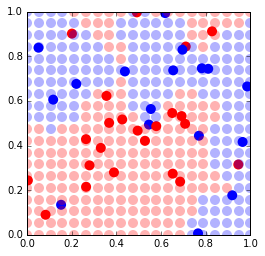

In [524]:
# Show the classification for a grid of points

def kgrid(k=1):
    grid = 20

    plt.axes().set_aspect('equal')
    plt.axis([i%2 for i in xrange(4)])
    plt.scatter(points[:,0], points[:,1], s=100, c=cs, linewidths=0)

    for x in np.linspace(0, 1, grid):
        for y in np.linspace(0, 1, grid):
            n = neighbors([x, y], points, k)
            c, m = classify(n)
            plt.scatter(x, y, s=100, linewidths=0, c='r' if c < 0 else 'b', alpha=.3)
            
interact(kgrid, k=(1,10,1))

In [525]:
x = np.linspace(0, 1, 4)
y = np.linspace(0, 3, 4)

print x
print y

print '==', x == y
print 'in', x in y
print 'any', (x == y).any()
print 'all', (x == y).all()

[ 0.          0.33333333  0.66666667  1.        ]
[ 0.  1.  2.  3.]
== [ True False False False]
in True
any True
all False


In [250]:
x = [[i for i in xrange(4)] for __ in xrange(2)]
y = [i for i in xrange(4)]

print x
print y

print '==', x == y
print 'in', y in x

[[0, 1, 2, 3], [0, 1, 2, 3]]
[0, 1, 2, 3]
== False
in True


In [252]:
list(np.linspace(0, 1, 10))

[0.0,
 0.1111111111111111,
 0.22222222222222221,
 0.33333333333333331,
 0.44444444444444442,
 0.55555555555555558,
 0.66666666666666663,
 0.77777777777777768,
 0.88888888888888884,
 1.0]

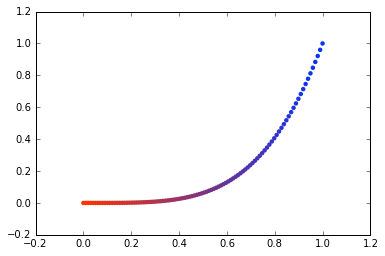

In [320]:
t = np.linspace(0, 1, 100)
cs = [(1-v, .2, v) for v in t]
plt.scatter(t, t**4, c=cs, linewidths=0)

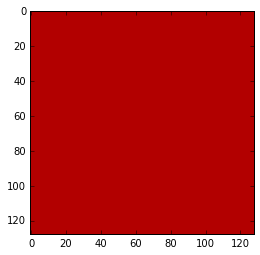

In [510]:
img = np.zeros((2**7, 2**7, 3))
img[:,:,0] = .7
plt.imshow(img)

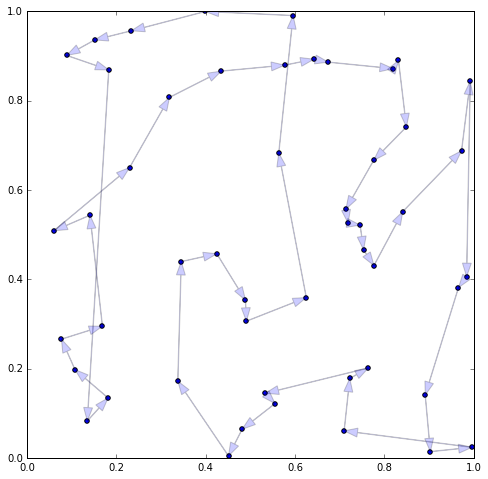

In [714]:
ps = np.random.random_sample((50, 2))
sp = [0, 0]

n = set()
nl = []
while len(n) < len(ps):
    # find next
    mind = float('+inf')
    mini = -1
    for i, p in enumerate(ps):
        if i in n:
            continue
        testd = abs(p[0]-sp[0]) + abs(p[1]-sp[1])
        if testd < mind:
            mind = testd
            mini = i
    n.add(mini)
    nl.append(mini)
    sp = ps[mini]
    
    
plt.figure(figsize=(8,8))
plt.axis([i%2 for i in xrange(4)])
plt.axes().set_aspect('equal')
pp = sp
for i in nl:
    p = ps[i]
    plt.arrow(pp[0], pp[1], p[0]-pp[0], p[1]-pp[1], length_includes_head=True, alpha=.2)
    pp = p
    
plt.scatter(ps[:,0], ps[:,1])

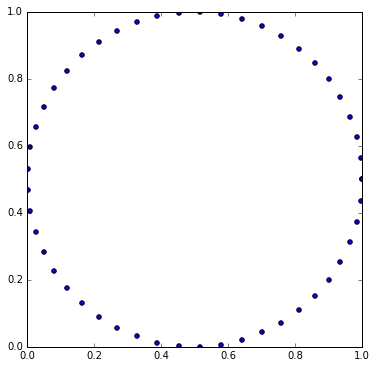

In [805]:
ps = np.random.random_sample((50, 2))
circ = np.array([[.5 + np.cos(t) * .5, .5 + np.sin(t) * .5] for t in np.linspace(0, 2*np.pi, 50)])

news = set()
newps = []

np.random.shuffle(circ)
for ci, cp in enumerate(circ):
    # find next
    mind = float('+inf')
    mini = -1
    for i, p in enumerate(ps):
        if i in news:
            continue
        testd = abs(p[0]-cp[0]) + abs(p[1]-cp[1])
        if testd < mind:
            mind = testd
            mini = i
    newps.append(ps[mini])
    news.add(mini)

newps = np.array(newps)

# newps = ps.copy()

def morph(t=0.0):
    m = newps.copy()
    
    m = newps * (1 - t) + circ * t
    
    plt.figure(figsize=(6,6))
    plt.axes().set_aspect('equal')
    plt.axis([0, 1, 0, 1])
    ms = m[0]
    plt.scatter(m[:,0], m[:,1])
#     for lm in m:
#         plt.plot([ms[0], lm[0]], [ms[1], lm[1]])
#         ms = lm
    
interact(morph, t=(-2, 2, .05))